In [1]:
import numpy as np
import math
from scipy.spatial.transform import Rotation
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt



In [4]:
# Fuctions from earlier
def CrossOp(p):
    return np.array([[0,-p[2],p[1]],
                    [p[2],0,-p[0]],
                    [-p[1],p[0],0]])

In [5]:
# Setup

R = np.array([[math.sqrt(1/2),-math.sqrt(1/2),0],
             [math.sqrt(1/2),math.sqrt(1/2),0],
             [0,0,1]])
t = np.array([0,0,10]).T
f = 1000
K = np.array([[f,0,960],
             [0,f,540],
             [0,0,1]])
Q = np.array([[0,0,0],
             [0,0,1],
              [0,1,0],
              [0,1,1],
              [1,0,0],
              [1,0,1],
              [1,1,0],
              [1,1,1]]).T



In [6]:
# Exercise 4.1
intri = np.vstack([R.T,t]).T
P = K@intri
Qh = np.vstack([Q, np.ones((1,len(Q.T)))])
qh = P@Qh
q = qh[:-1]/qh[-1]
print(q.T)


[[ 960.          540.        ]
 [ 960.          540.        ]
 [ 889.28932188  610.71067812]
 [ 895.71756535  604.28243465]
 [1030.71067812  610.71067812]
 [1024.28243465  604.28243465]
 [ 960.          681.42135624]
 [ 960.          668.56486931]]


In [7]:
def normalize2d(Q):
    Qh = np.vstack([Q, np.ones((1,len(Q.T)))])
    mean = np.mean(Qh,axis=1)
    std = np.std(Qh,axis=1)
    T = np.array([[1/std[0],0,-mean[0]/std[0]],
                  [0,1/std[1],-mean[1]/std[1]],
                 [0,0,1]])
    qh =T@Qh
    return qh, T

In [8]:
# Exercise 4.2


B = np.kron(Qh[:,0],CrossOp(qh[:,0]))
for i in range(1,len(Qh.T)):
    B = np.vstack([B, np.kron(Qh[:,i],CrossOp(qh[:,i]))])

U,S,VT = np.linalg.svd(B)
P_est = np.reshape(VT[-1],(4,3)).T

print("P",P)
print("P_est",P_est)
qh_est = P_est@Qh
q_est = qh_est[:-1]/qh_est[-1]
print(q_est.T)

print((P[0,0]/P_est[0,0])*P_est)



P [[ 7.07106781e+02 -7.07106781e+02  9.60000000e+02  9.60000000e+03]
 [ 7.07106781e+02  7.07106781e+02  5.40000000e+02  5.40000000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+01]]
P_est [[ 6.33639514e-02 -6.33639514e-02  8.60257530e-02  8.60257530e-01]
 [ 6.33639514e-02  6.33639514e-02  4.83894861e-02  4.83894861e-01]
 [-4.38241294e-16  1.58408714e-16  8.96101594e-05  8.96101594e-04]]
[[ 960.          540.        ]
 [ 960.          540.        ]
 [ 889.28932188  610.71067812]
 [ 895.71756535  604.28243465]
 [1030.71067812  610.71067812]
 [1024.28243465  604.28243465]
 [ 960.          681.42135624]
 [ 960.          668.56486931]]
[[ 7.07106781e+02 -7.07106781e+02  9.60000000e+02  9.60000000e+03]
 [ 7.07106781e+02  7.07106781e+02  5.40000000e+02  5.40000000e+03]
 [-4.89053136e-12  1.76775395e-12  1.00000000e+00  1.00000000e+01]]


In [9]:
# Exercise 4.2 - norm

qn, Tra = normalize2d(q)
B = np.kron(Qh[:,0],CrossOp(qn[:,0]))
for i in range(1,len(Qh.T)):
    B = np.vstack([B, np.kron(Qh[:,i],CrossOp(qn[:,i]))])

U,S,VT = np.linalg.svd(B)
P_est = np.reshape(VT[-1],(4,3)).T

print("P",P)
print("P_est",P_est)
qh_est = P_est@Qh
qh_est = np.linalg.inv(Tra)@qh_est
q_est = qh_est[:-1]/qh_est[-1]
print(q_est.T)

print((P[0,0]/P_est[0,0])*P_est)

P [[ 7.07106781e+02 -7.07106781e+02  9.60000000e+02  9.60000000e+03]
 [ 7.07106781e+02  7.07106781e+02  5.40000000e+02  5.40000000e+03]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.00000000e+01]]
P_est [[-4.31600499e-01  4.31600499e-01 -1.66533454e-16  4.44089210e-16]
 [-4.30627329e-01 -4.30627329e-01  4.11053359e-02  4.11053359e-01]
 [ 1.02695630e-15 -9.15933995e-16 -2.91645577e-02 -2.91645577e-01]]
[[ 960.          540.        ]
 [ 960.          540.        ]
 [ 889.28932188  610.71067812]
 [ 895.71756535  604.28243465]
 [1030.71067812  610.71067812]
 [1024.28243465  604.28243465]
 [ 960.          681.42135624]
 [ 960.          668.56486931]]
[[ 7.07106781e+02 -7.07106781e+02  2.72837809e-13 -7.27567490e-13]
 [ 7.05512401e+02  7.05512401e+02 -6.73443655e+01 -6.73443655e+02]
 [-1.68249982e-12  1.50060795e-12  4.77813546e+01  4.77813546e+02]]


In [10]:
# Exercise 4.3

def checkerboard_points(n,m):
    Q = np.zeros((3,n*m))
    for i in range(n):
        for j in range(m):
            Q[:,i*m+j] = np.array([i-((n-1)/2),j-((m-1)/2),0])
    return Q



In [11]:
# Exercise 4.4

Q_omega = checkerboard_points(10,20)
R_a = Rotation.from_euler('xyz',[math.pi/10,0,0]).as_matrix()
R_b = Rotation.from_euler('xyz',[0,0,0]).as_matrix()
R_c = Rotation.from_euler('xyz',[-math.pi/10,0,0]).as_matrix()


Q_a = R_a@Q_omega
Q_b = R_b@Q_omega
Q_c = R_c@Q_omega

intri = np.vstack([R.T,t]).T
P = K@intri
Qh_a = np.vstack([Q_a, np.ones((1,len(Q_a.T)))])
Qh_b = np.vstack([Q_b, np.ones((1,len(Q_b.T)))])
Qh_c = np.vstack([Q_c, np.ones((1,len(Q_c.T)))])
qh_a = P@Qh_a
qh_b = P@Qh_b
qh_c = P@Qh_c
q_a = qh_a[:-1]/qh_a[-1]
q_b = qh_b[:-1]/qh_b[-1]
q_c = qh_c[:-1]/qh_c[-1]



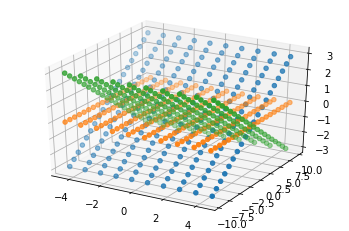

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(Q_a[0,:],Q_a[1,:],Q_a[2,:])
ax.scatter3D(Q_b[0,:],Q_b[1,:],Q_b[2,:])
ax.scatter3D(Q_c[0,:],Q_c[1,:],Q_c[2,:])
plt.show()

In [13]:
def hest(q1,q2):
    #q1 = [[x10_result, x11_result][y10_result, y11_result]] #first number which q, second which column
    #q2 = [[x20_original, x21_original],[y20_original, y21_original]]
    #q1 = H@q2
    assert len(q1[0])>1, "We need at least two points (aka two columns)"
    assert len(q1[0])==len(q2[0]), "Number of column of q1 and q2 must be equal!"
    B = get_b(q1,q2)#np.vstack((B0,B1))
    #print("B")
    #print(B.round(1)) # does not matter whether there is 1 or 3 in the top right 3x3 matrix
    U,S,VT = np.linalg.svd(B) #U,S,VT = np.linalg.svd(np.hstack((B.T,B)))
    H = np.reshape(VT[-1],(3,3)).T # VT is sorted in descending order of singular value
    return H

def get_b(q1,q2):
    B = np.kron(q2[:,0], CrossOp(q1[:,0]))
    for i in range(1,len(q1.T)):
        B_temp = np.kron(q2[:,i], CrossOp(q1[:,i]))
        B = np.vstack((B,B_temp))
    return B

In [14]:
# Exercise 4.5
def estimateHomographies(Q_omega,qs):
    Q_omega_mz = Q_omega[:-1]
    Qh_omega = np.vstack([Q_omega_mz, np.ones((1,len(Q_omega_mz.T)))])
    Hs = []
    for q in qs:
        qh = np.vstack([q,np.ones((1,len(q.T)))])
        Hs.append(hest(qh,Qh_omega))
    return Hs



In [15]:
Hs = estimateHomographies(Q_omega,[q_a,q_b,q_c])
Q_omega_mz = Q_omega[:-1]
Qh_omega = np.vstack([Q_omega_mz, np.ones((1,len(Q_omega_mz.T)))])
Hh_test = Hs[2]@Qh_omega
H_test = Hh_test[:-1]/Hh_test[-1]
print((H_test-q_c).T)

print(Hs[0])
print(Hs[0][1,2])

[[-5.31372280e-10  8.67146355e-11]
 [-4.70663508e-10  6.54551968e-11]
 [-4.10409484e-10  4.58868499e-11]
 [-3.51519702e-10  2.80806489e-11]
 [-2.92970981e-10  1.24202870e-11]
 [-2.36354936e-10 -5.29354338e-13]
 [-1.81898940e-10 -1.01536557e-11]
 [-1.30057742e-10 -1.60298441e-11]
 [-8.18545232e-11 -1.73372428e-11]
 [-3.80850906e-11 -1.31308298e-11]
 [-1.13686838e-13 -2.35900188e-12]
 [ 3.09228199e-11  1.60866875e-11]
 [ 5.30349098e-11  4.38831194e-11]
 [ 6.46309672e-11  8.28208613e-11]
 [ 6.24993390e-11  1.35059963e-10]
 [ 4.44231318e-11  2.03499440e-10]
 [ 5.61506397e-12  2.91379365e-10]
 [-5.85771431e-11  4.02337719e-10]
 [-1.53931978e-10  5.42627276e-10]
 [-2.87968760e-10  7.17363946e-10]
 [-5.70707925e-10  6.49151843e-11]
 [-5.08862286e-10  4.47357706e-11]
 [-4.47016646e-10  2.62048161e-11]
 [-3.85625754e-10  9.33653155e-12]
 [-3.24689609e-10 -4.80682161e-12]
 [-2.65686140e-10 -1.61648472e-11]
 [-2.08274287e-10 -2.42863507e-11]
 [-1.53249857e-10 -2.81090706e-11]
 [-1.01294972e-10 -2

In [16]:
# Exercise 4.6
def estimate_b(Hs):
    V = make_Vrow(Hs[0])
    for i in range(1,len(Hs)):
        V = np.vstack([V,make_Vrow(Hs[i])])
    U,S,VT = np.linalg.svd(V)
    b = VT[-1]
    return b
    
    
    
def make_Vrow(H):
    v12 = np.array([H[0,0]*H[0,1],H[0,0]*H[1,1]+H[1,0]*H[0,1],H[1,0]*H[1,1],
                   H[2,0]*H[0,1]+H[0,0]*H[2,1],H[2,0]*H[1,1]+H[1,0]*H[2,1],H[2,0]*H[2,1]])
    v11 = np.array([H[0,0]*H[0,0],H[0,0]*H[1,0]+H[1,0]*H[0,0],H[1,0]*H[1,0],
                   H[2,0]*H[0,0]+H[0,0]*H[2,0],H[2,0]*H[1,0]+H[1,0]*H[2,0],H[2,0]*H[2,0]])
    v22 = np.array([H[0,1]*H[0,1],H[0,1]*H[1,1]+H[1,1]*H[0,1],H[1,1]*H[1,1],
                   H[2,1]*H[0,1]+H[0,1]*H[2,1],H[2,1]*H[1,1]+H[1,1]*H[2,1],H[2,1]*H[2,1]])
    V = np.vstack([v12,v11-v22])
    return V
    



In [17]:
Btrue = np.linalg.inv(K.T)@np.linalg.inv(K)
btrue = np.array([Btrue[0,0],Btrue[0,1],Btrue[1,1],Btrue[0,2],Btrue[1,2],Btrue[2,2]])
print(btrue)
b = estimate_b(Hs)
print((btrue[0]/b[0])*b-btrue)
# Yes it's scaled b_true since where they are most apart it is a scale of 10^(-12)

[ 1.0000e-06  0.0000e+00  1.0000e-06 -9.6000e-04 -5.4000e-04  2.2132e+00]
[ 0.00000000e+00 -3.49388556e-19 -1.62418568e-19  1.76399693e-16
  1.12399239e-15 -8.79296636e-12]


In [18]:
# Exercise 4.7

def estimateIntrinsics(Hs):
    b = estimate_b(Hs)
    v0 = (b[1]*b[3]+b[0]*b[4])/(b[0]*b[2]-b[1]**2)
    lamb = b[5]-((b[3]**2+v0*(b[1]*b[3]-b[0]*b[4]))/b[0])
    alpha = math.sqrt(lamb/b[0])
    beta = math.sqrt((lamb*b[0])/(b[0]*b[2]-b[1]**2))
    gamma = -b[1]*alpha**2*beta/lamb
    u0 = gamma*v0/beta - b[3]*alpha**2/lamb
    K = np.array([[alpha,gamma,u0],
                  [0,beta,v0],
                  [0,0,1]])
    return K

print(estimateIntrinsics(Hs)) #It's alright. The f is a bit of and the sign of v0 is wrong

[[ 1.25825276e+03  4.39619113e-10  9.60000000e+02]
 [ 0.00000000e+00  1.25825276e+03 -5.40000000e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [40]:
# Exercise 4.8
def estimateExtrinsics(K,Hs):
    ts = []
    Rs = []
    for H in Hs:
        lamb = np.linalg.norm(np.linalg.inv(K)*H[:,0],2)
        r1 = (1/lamb)*np.linalg.inv(K)@H[:,0]
        r2 = (1/lamb)*np.linalg.inv(K)@H[:,1]
        r3 = np.cross(r1,r2)
        ts.append((1/lamb)*np.linalg.inv(K)@H[:,2])
        Rs.append(np.vstack([r1,r2,r3]).T)
    print(ts)
    ts = np.mean(ts,axis=0)    
    
    Rs = np.mean(Rs,axis=2)
    return Rs, ts

Rs,ts = estimateExtrinsics(K,Hs)
print("Rs")
print(Rs)
print("ts")
print(ts)
    
print("Diff from original R")
print(R-Rs)

    
print("Diff from original t")
print(t-ts)

[array([-4.63629135e-13, -2.58459920e-13,  1.41421356e+01]), array([-1.27897692e-12, -7.17648163e-13,  1.41421356e+01]), array([-1.33404399e-12, -7.49622586e-13,  1.41421356e+01])]
Rs
[[ 1.61986503e-01  5.04680164e-01  7.79709686e-01]
 [ 4.32291904e-13  6.66666667e-01  6.66666667e-01]
 [-1.29357514e-01  7.96024180e-01  4.88365669e-01]]
ts
[-1.02555002e-12 -5.75243556e-13  1.41421356e+01]
Diff from original R
[[ 0.54512028 -1.21178695 -0.77970969]
 [ 0.70710678  0.04044011 -0.66666667]
 [ 0.12935751 -0.79602418  0.51163433]]
Diff from original t
[ 1.02555002e-12  5.75243556e-13 -4.14213562e+00]


In [20]:
print(Hs[0])

[[ 6.37147183e-02 -3.38657193e-02  8.65019701e-01]
 [ 6.37147183e-02  7.56322486e-02  4.86573582e-01]
 [ 2.92734587e-18  2.78443529e-05  9.01062188e-04]]


In [21]:
def calibratecamera(qs,Q):
    Hs = estimateHomographies(Q,qs)
    K = estimateIntrinsics(Hs)
    Rs, ts = estimateExtrinsics(K,Hs)
    return K, Rs, ts
    
    